# Aprendizaje Formal

## Práctica 8: Support Vector Machines (SVMs)

En esta práctica vamos a estudiar las Support Vector Machines (SVMs). Primero comenzaremos con unos ejemplos simples en 2D para entender cómo funciona y luego las utilizaremos para aprender un clasificador de Spam.

## Índice de la práctica

- [Función mostrar](#Función-mostrar)
- [Dataset de ejemplo 1 - SVM lineal](#Dataset-de-ejemplo-1---SVM-lineal)
- [Dataset de ejemplo 2 - SVMs con Kernel Gaussiano](#Dataset-de-ejemplo-2---SVMs-con-Kernel-Gaussiano)
- [Dataset de ejemplo 3 - Ajuste de parámetros](#Dataset-de-ejemplo-3---Ajuste-de-parámetros)
- [Clasificador de Spam](#Clasificador-de-Spam)
- [Tarea extra opcional: ¿Puedes mejorar el clasificador de Spam?](#Tarea-extra-opcional:-¿Puedes-mejorar-el-clasificador-de-Spam?)


### Imports necesarios

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from test_helper import Test
%matplotlib inline

### Función mostrar
Esta función nos permitirá mostrar los ejemplos de entrenamiento en una gráfica 2D y dibujar las fronteras de decisión en caso de pasar un clasificador SVM de scikit como tercer parámetro.

Completa las instrucciones necesarias.

In [10]:
def mostrar(X, y, clasificador=None):
    """
    Esta función muestra las fronteras de decisión del clasificador ya entrenado y los ejemplos en X
    (con el color dependiendo de y).
    :param clasificador: Clasificador entrenado de scikit-learn
    :param X: Matriz con los ejemplos a mostrar
    :param y: Vector con las salidas de los ejemplos a mostrar
    :return: Nada
    """
    # Creamos los mapas de colores a utilizar
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Creamos la figura
    plt.figure(figsize=(10,8))

    # Primer plot a la izquierda
    plt.subplot(111)

    if clasificador is not None:
        # Preparamos los ejemplos de entrada para poder pintar la frontera de decisión
        # Asignamos una clase (color) a cada ejemplo de la malla en [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() * 0.9-0.05, X[:, 0].max() * 1.1
        y_min, y_max = X[:, 1].min() * 0.9-0.05, X[:, 1].max() * 1.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))

        # Clasificamos los puntos
        Z = clasificador.predict(np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1))))
        # Ponemos el resultado en el formato deseado
        Z = Z.reshape(xx.shape)

        # Pintamos las fronteras
        plt.contour(xx, yy, Z, [0.0], linewidths=1, colors='b');
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    
    # Pintamos los puntos
    plt.scatter(X[:,0],X[:,1], cmap=cmap_bold, s=30)
    # Asignamos el título
    plt.title("Ejemplos de Train")
    
    if clasificador is not None:
        # Establecemos los límites
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())

    
    # Mostramos la figura
    plt.show()
    return

## Dataset de ejemplo 1 - SVM lineal
Vamos a comenzar con un dataset 2-dimensional simple y vamos a ver cómo una SVM lineal aprende el modelo para valores diferentes de $C$. Recuerda que $C$ es similar al concepto de término de regularización en la regresión lineal/logística, pero funciona de manera inversa. Es decir, a mayor $C$ más se ajusta el modelo a los datos (en la regresión, a mayor $\lambda$ menos le permitimos ajustarse al modelo).

Carga los datos que están en el fichero `ex8data1.txt` con `np.loadtxt` (delimitador ',') y crea la matriz $X$ y el vector columna con las salidas $y$.

In [11]:
data = np.loadtxt('ex8data1.txt',delimiter=',')
X = data[:,:-1]
y = data[:, -1].reshape(-1, 1)
print y.shape, X.shape

(51L, 1L) (51L, 2L)


Vamos ahora a mostrar los datos leídos con la función mostrar creada anteriormente.

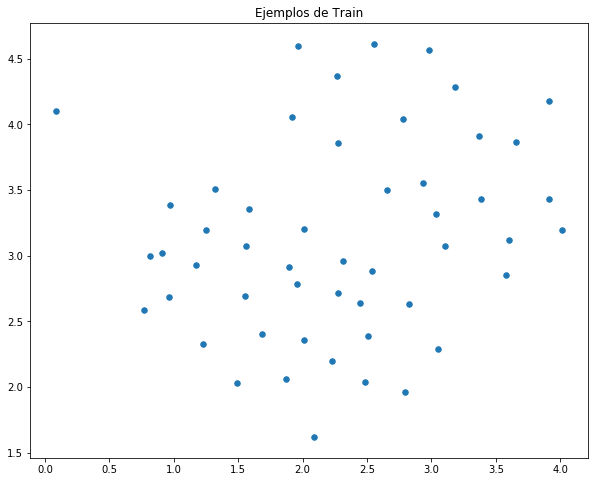

In [12]:
mostrar(X,y,clasificador=None)

Como se puede observar, los datos son linealmente separables. Sin embargo, hay un ejemplo azul que puede ser un outlier de la clase que está aparte del resto. Vamos a ver cómo se comporta una SVM lineal al aprender la frontera de decisión.

En esta práctica no vamos a implementar la SVM desde 0, sino que utilizaremos la SVM existente en scikit-learn.

In [13]:
# Importamos las SVMs
from sklearn import svm
# Creamos un clasificador SVM con C=1.0, loss='hinge' y máximo número de iteraciones = 1000
svc = svm.LinearSVC(C=1.0,loss='hinge',max_iter=1000)
svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

En este primer experimento usaremos $C=1$ y veremos cómo se comporta.

Utiliza `fit` para entrenar el modelo con los datos en $X$ e $y$. Posteriormente puedes usar el método `score` para obtener la precisión (a partir de $X$ e $y$).

In [14]:
# Entrenamos el modelo
svc.fit(X,y.ravel())
# Obtenemos la precisión con svc.score
accTrain = svc.score(X,y)
print "Precisión en train: {}".format(accTrain)

Test.assertEquals(round(accTrain, 5), 0.98039, 'Precisión en train incorrecta')

Precisión en train: 0.980392156863
1 test passed.


Como podemos ver en la precisión, aunque el problema es linealmente separable, no acertamos todos los ejemplos de entrenamiento, ¿estaremos fallando el outlier?

Utiliza la función `mostrar` para ver los ejemplos y la frontera de decisión obtenida.

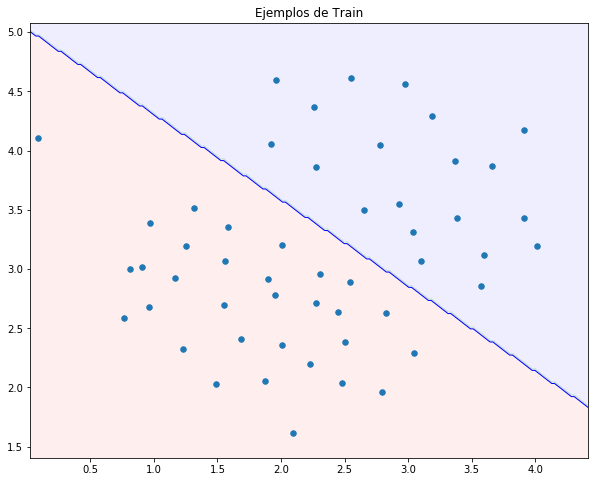

In [15]:
mostrar(X,y,clasificador=svc)

Entrena ahora una nueva SVM con $C=1000$ para poder comparar ambas. En este caso, como $C$ toma un valor alto, penalizará mucho los fallos y por tanto tratará de acertar todos los ejemplos de entrenamiento. Veremos si lo consigue.

In [16]:
# Creamos un clasificador SVM con C=1000.0, loss='hinge' y máximo número de iteraciones = 10000
svc2 = svm.LinearSVC(C=1000.0,loss='hinge',max_iter=10000)

In [17]:
# Entrenamos el modelo
svc2.fit(X,y.ravel())
# Obtenemos la precisión
accTrain = svc2.score(X,y)
print "Precisión en train: {}".format(accTrain)

Test.assertEquals(round(accTrain, 5), 1.0, 'Precisión en train incorrecta')

Precisión en train: 1.0
1 test passed.


En este caso obtenemos una clasificación perfecta en el entrenamiento, pero al incrementar el valor de $C$ hemos creado una frontera de decisión que ya no es natural para los datos. Visualízala con la función `mostrar` para comprobarlo.

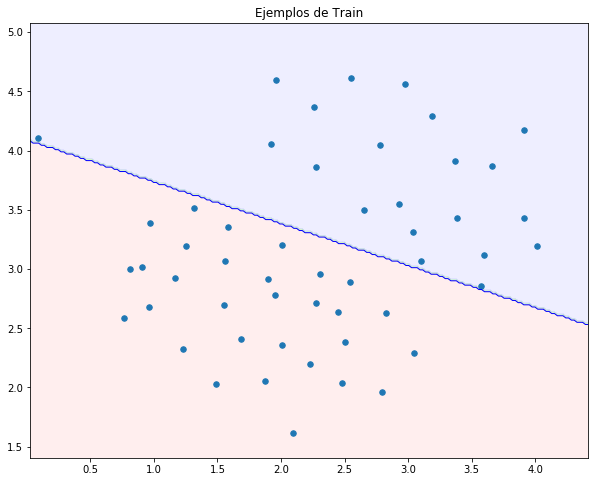

In [18]:
mostrar(X,y,clasificador=svc2)

La diferencia queda clara atendiendo a la recta que marca la frontera de decisión.

## Dataset de ejemplo 2 - SVMs con Kernel Gaussiano

Ahora vamos a pasar del SVM lineal a otro que es capaz de crear fronteras de decisión no lineales usando kernels. En primer lugar, vamos a comenzar implementado la función de Kernel Gaussiana. Aunque el propio scikit-learn tiene los kernels implementados, vamos a comprender un poco mejor qué conseguimos con ellos.

Puedes pensar en la función Kernel Gaussiana como una función de similitud que mide la "distancia" entre dos pares de ejemplos $(x^{(i)}, x^{(j)})$. El kernel Gaussiano normalmente está parametrizado por el parámetro $\sigma$ que determina cómo de rápido decrece la medida de similitud hacia 0 (según los ejemplos están más lejanos).

Implementa la función kernel Gaussiana que se define de la siguiente forma:

$$ K_{gaussian}(x^{(i)}, x^{(j)}) = exp\Big(-\frac{||{x^{(i)}- x^{(j)}}||^2}{2\sigma^2}\Big) = exp\Big(-\frac{\sum_{k=1}^{n}{(x^{(i)}- x^{(j)})^2}}{2\sigma^2}\Big)$$

In [19]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp((-np.sum((x1-x2)**2))/(2*sigma**2))

Comprobemos si la hemos implementado bien. Calcula la "similitud" entre x1 y x2 con $\sigma= 2$.

In [20]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

print gaussian_kernel(x1, x2, sigma)

Test.assertEquals(round(gaussian_kernel(x1, x2, sigma), 4), 0.3247, 'Función kernel gaussiana incorrecta')

0.324652467358
1 test passed.


Ahora vamos a trabajar con otro dataset como ya hemos comentado. Lee el fichero `ex8data2.txt` y carga los datos como siempre en $X$ e $y$. Muestra los ejemplos de entrenamiento usando mostrar.

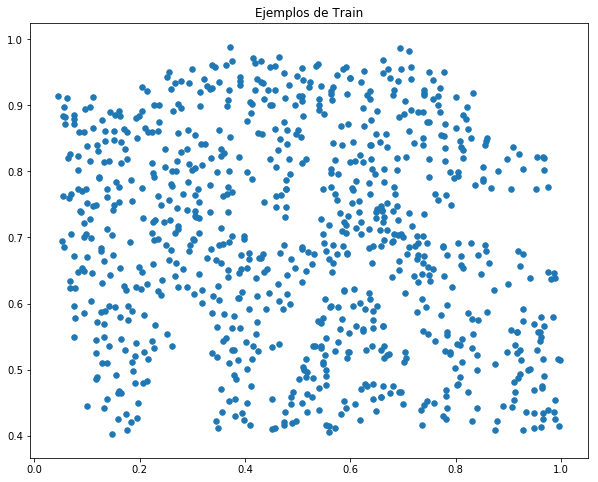

In [21]:
data = np.loadtxt('ex8data2.txt',delimiter=',')
X = data[:,:-1]
y = data[:, -1].reshape(-1, 1)
# Mostrar los ejemplos
mostrar(X,y,clasificador=None)

Para este conjunto de datos vamos a utilizar una SVM con kernel RBF (Gaussiano). Crea el clasificador con C = 1000 y gamma = 10 (es el $\sigma$ del kernel Gaussiano). **Nota: Pasamos de usar LinearSVC a SVC que es el que soporta diferentes kernels**.

In [22]:
svc = svm.SVC(C=1000.0,gamma=10)
svc

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
# Entrenamos el modelo
svc.fit(X,y.ravel())
# Obtenemos la precisión
accTrain = svc.score(X,y)
print "Precisión en train: {}".format(accTrain)

Test.assertEquals(round(accTrain, 5), 0.98957, 'Precisión en train incorrecta')

Precisión en train: 0.989571263036
1 test passed.


Muestra ahora los datos junto a la frontera de decisión.

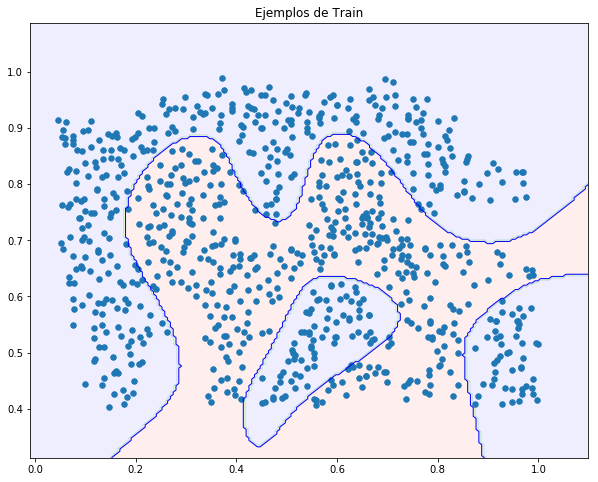

In [24]:
mostrar(X,y,clasificador=svc)

## Dataset de ejemplo 3 - Ajuste de parámetros

En el caso del tercer conjunto de datos, tenemos dos ficheros `ex8data3train.txt` y `ex8data3val.txt` que son el conjunto de entrenamiento y el de validación, respectivamente. Vamos a llevar a cabo una tarea muy habitual en las SVMs, que es el ajuste de los híper-parámetros del modelo en base al conjunto de validación. Aunque podríamos usar un grid-search interno de scikit-learn, vamos a realizarlo nosotros mismos.

En primer lugar, lee los datos, asígnalos a las variables correspondientes y muestra los ejemplos de train.

(211L, 2L)
(211L, 1L)
(200L, 2L)
(200L, 1L)


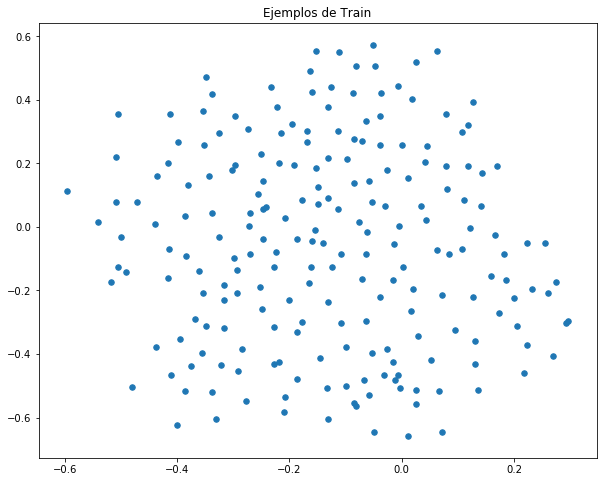

In [48]:
dataTrain = np.loadtxt('ex8data3train.txt',delimiter=',')
dataVal = np.loadtxt('ex8data3val.txt',delimiter=',')
X = dataTrain[:,:-1]
y = dataTrain[:, -1].reshape(-1, 1)
Xval = dataVal[:,:-1]
yval = dataVal[:, -1].reshape(-1, 1)
print X.shape
print y.shape
print Xval.shape
print yval.shape

# mostrar ejemplos
mostrar(X,y,clasificador=None)

Ahora debes aprender varias SVMs con todas las combinaciones de valores de C y gamma y quedarte con el que menor error de validación obtenga. Finalmente, muestra los datos de train junto con el clasificador correspondiente a dichos parámetros.

Parámetros seleccionados:  {'C': 0.3, 'gamma': 100}
Precisión en train: 0.952606635071
Precisión en validación: 0.965


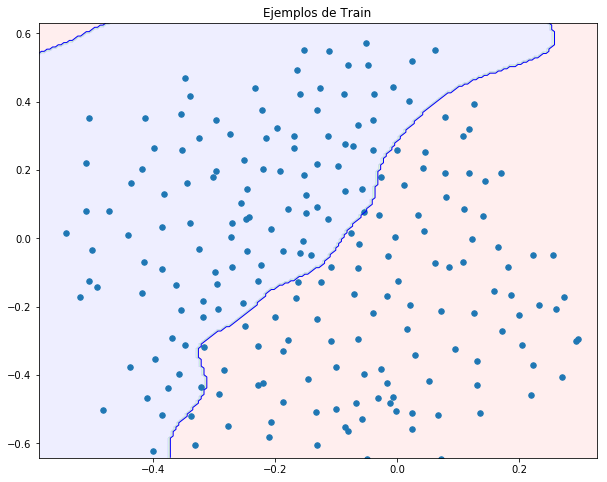

1 test passed.
1 test passed.


In [29]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_accVal = 0
best_params = {'C': None, 'gamma': None}

for C in range(len(C_values)):
    for gamma in range(len(gamma_values)):
        # Creamos la SVM con C=C y gamma=gamma
        svc = svm.SVC(C=C_values[C],gamma=gamma_values[gamma])
        # Entrenamos la SVM con los datos de train
        svc.fit(X,y.ravel())
        # Obtenemos la precisión en los datos de validación
        accVal = svc.score(Xval,yval)
        
        # Si la precisión actual es mejor que la mejor encontrada hasta ahora...
        if accVal>best_accVal:
            # Guardamos la mejor precisión encontrada y los parámetros usados
            best_accVal = accVal
            best_params['C'] =C_values[C]
            best_params['gamma'] = gamma_values[gamma]

            
# mostramos los parámetros seleccionados
print "Parámetros seleccionados: ", best_params
# Creamos una SVM con los mejores parámetros C y gamma encontrados
svc = svm.SVC(C = best_params['C'],gamma = best_params['gamma'])
# Entrenamos la SVM con los datos de train
svc.fit(X, y.ravel())
# Obtenemos la precisión en train y validación
accTrain = svc.score(X, y)
accVal = svc.score(Xval, yval)
print "Precisión en train: {}".format(accTrain)
print "Precisión en validación: {}".format(accVal)

# mostramos la frontera de decisión encontrada con los datos de train
mostrar(X, y, svc)


Test.assertEquals(round(accTrain, 5), 0.95261, 'Precisión en train incorrecta')
Test.assertEquals(round(accVal, 5), 0.96500, 'Precisión en validación incorrecta')

# Clasificador de Spam
En este último apartado vamos a tratar con el problema de clasificación de Spam con el que ya tratamos en la práctica de Naive Bayes. En este caso, en los ficheros `spamTrain.txt`  y `spamTest.txt` tenéis directamente los vectores de características que representan a cada email. Es decir, el preprocesamiento y la obtencción del diccionario ya ha sido realizada, siguiendo las mismas fases que seguíamos en la práctica 6.

Por tanto, cada email va a estar representado por la presencia o no presencia de las 1899 palabras que hemos utilizado como diccionario. Así pues, tenemos 1899 características para cada email y su clase podrá ser 0 o 1 indicando si no es spam o sí lo es.

Lee los datos y almacénalos en las variables correspondientes.

In [53]:
dataTrain = np.loadtxt('spamTrain.txt',delimiter=',')
dataTest =  np.loadtxt('spamTest.txt',delimiter=',')
X = dataTrain[:, :-1]
y = dataTrain[:, -1].reshape(-1, 1)
Xtest = dataTest[:, :-1]
ytest = dataTest[:, -1].reshape(-1, 1)


print X.shape, y.shape, Xtest.shape, ytest.shape

(4000L, 1899L) (4000L, 1L) (1000L, 1899L) (1000L, 1L)


Ahora crea un clasificador SVM (con los parámetros por defecto), entrénalo y comprueba su precisión en train y en test.

In [33]:
# Creamos el clasificador SVM
svc = svm.SVC()
# Entrenamos el clasificador SVM
svc.fit(X,y.ravel())
# Obtenemos la precisión en Training
accTrain = svc.score(X,y)
# Obtenemos la precisión en Test
accTest = svc.score(Xtest,ytest)
print "Precisión en train: {}".format(accTrain)
print "Precisión en validación: {}".format(accTest)


Test.assertEquals(round(accTrain, 5), 0.944, 'Precisión en train incorrecta')
Test.assertEquals(round(accTest, 5), 0.953, 'Precisión en test incorrecta')

Precisión en train: 0.944
Precisión en validación: 0.953
1 test passed.
1 test passed.


# Tarea extra opcional: ¿Puedes mejorar el clasificador de Spam?
En este último ejercicio hemos utilizado la SVM sin ajustar ninguno de sus parámetros, lo cual no es lo adecuado cuando afrontamos problemas reales. Trata de mejorar los resultados obtenidos sobre la clasificación de Spam ajustando sus parámetros. Puedes ajustar C y gamma. Para ser 100% legal, deberías partir el conjunto de entrenamiento en dos y utilizar  una de las dos partes (la más pequeña) como validación. Finalmente, para obtener el resultado en test con el mejor valor de los parámetros encontrados puedes reentrenar el clasificador con todo el conjunto de train original.

In [58]:
print X.shape

Xtrain=X[:int(X.shape[0]*0.8),:]
Xval=X[-int(X.shape[0]*0.2):,:]
ytrain=y[:int(X.shape[0]*0.8),:]
yval=y[-int(X.shape[0]*0.2):,:]
print Xtrain.shape
print Xval.shape
print ytrain.shape
print yval.shape

(4000L, 1899L)
(3200L, 1899L)
(800L, 1899L)
(3200L, 1L)
(800L, 1L)


In [61]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

best_accVal = 0
best_params = {'C': None, 'gamma': None}

for C in range(len(C_values)):
    for gamma in range(len(gamma_values)):
         # Creamos la SVM con C=C y gamma=gamma
        svc = svm.SVC(C=C_values[C],gamma=gamma_values[gamma])
        # Entrenamos la SVM con los datos de train
        svc.fit(Xtrain,ytrain.ravel())
        # Obtenemos la precisión en los datos de validación
        accVal = svc.score(Xval,yval)
        # Si la precisión actual es mejor que la mejor encontrada hasta ahora...
        if accVal>best_accVal:
            # Guardamos la mejor precisión encontrada y los parámetros usados
            best_accVal = accVal
            best_params['C'] =C_values[C]
            best_params['gamma'] = gamma_values[gamma]

# mostramos los parámetros seleccionados
print "Parámetros seleccionados: ", best_params
# Creamos una SVM con los mejores parámetros C y gamma encontrados
svc = svm.SVC(C = best_params['C'],gamma = best_params['gamma'])
# Entrenamos la SVM con los datos de train
svc.fit(Xtrain, ytrain.ravel())
# Obtenemos la precisión en train y validación y en test
accTrain = svc.score(Xtrain, ytrain)
accVal = svc.score(Xval, yval)
accTest=svc.score(Xtest,ytest)
print "Precisión en train: {}".format(accTrain)
print "Precisión en validación: {}".format(accVal)
print "Precisión en test: {}".format(accTest)

        

Parámetros seleccionados:  {'C': 3, 'gamma': 0.01}
Precisión en train: 0.9984375
Precisión en validación: 0.97625
Precisión en test: 0.989
